<a href="https://colab.research.google.com/github/surya323-ma/machine-larning-/blob/main/telecom_customer_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded=files.upload()
file_name = next(iter(uploaded))
df=pd.read_csv(file_name)
print(df.columns)
df.head()

Saving 1730285168-TelecomCustomerChurn.csv to 1730285168-TelecomCustomerChurn (1).csv
Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.isnull()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
y=df['Churn']
x = df.copy()
x = x.drop(['Churn','customerID'], axis=1)

In [16]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


In [31]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)


In [21]:
x.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65


In [22]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x=oe.fit_transform(x)

In [25]:
x

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.420e+02,
        2.505e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 4.980e+02,
        1.466e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 4.360e+02,
        1.570e+02],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.370e+02,
        2.994e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 2.000e+00, 7.950e+02,
        2.660e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.388e+03,
        5.407e+03]])

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred = rfc.predict(x_test)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.90      0.84      0.87      1021
         Yes       0.86      0.91      0.88      1049

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070



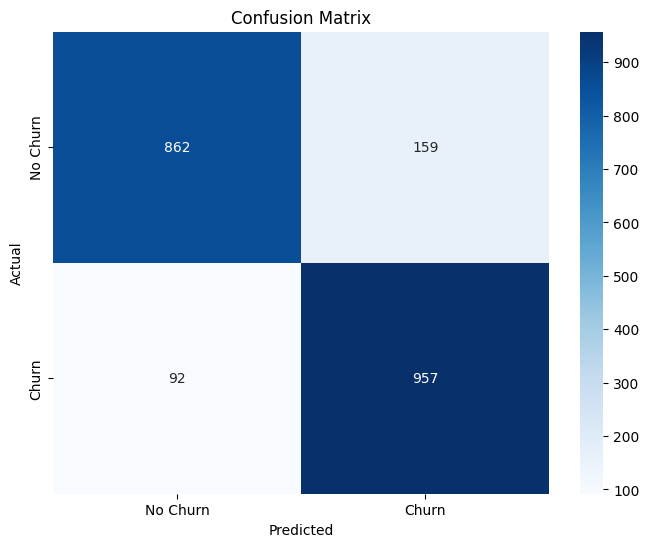

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

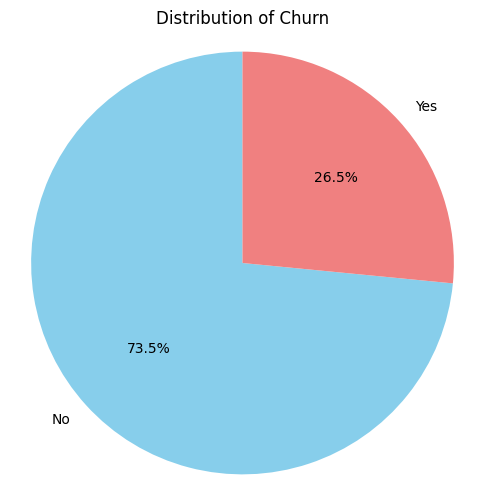

In [49]:
import matplotlib.pyplot as plt

churn_counts = y.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Churn')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Identify key visualizations

### Subtask:
Determine which plots and charts (e.g., distribution of features, churn rate by different categories, model performance metrics like confusion matrix and classification report) would be most informative for the dashboard.


**Reasoning**:
Review the available columns to determine which features are suitable for visualization and their relationship with the target variable 'Churn', and identify appropriate plots for data distribution and model performance.



In [7]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
file_name = next(iter(uploaded))
df=pd.read_csv(file_name)
print(df.columns)

Saving 1730285168-TelecomCustomerChurn.csv to 1730285168-TelecomCustomerChurn (4).csv
Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## Generate visualizations

### Subtask:
Create the code for each of the selected visualizations using appropriate libraries (like Matplotlib, Seaborn, or Plotly).


**Reasoning**:
Create bar plots for the distribution of each categorical feature and the churn rate within each category.



/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


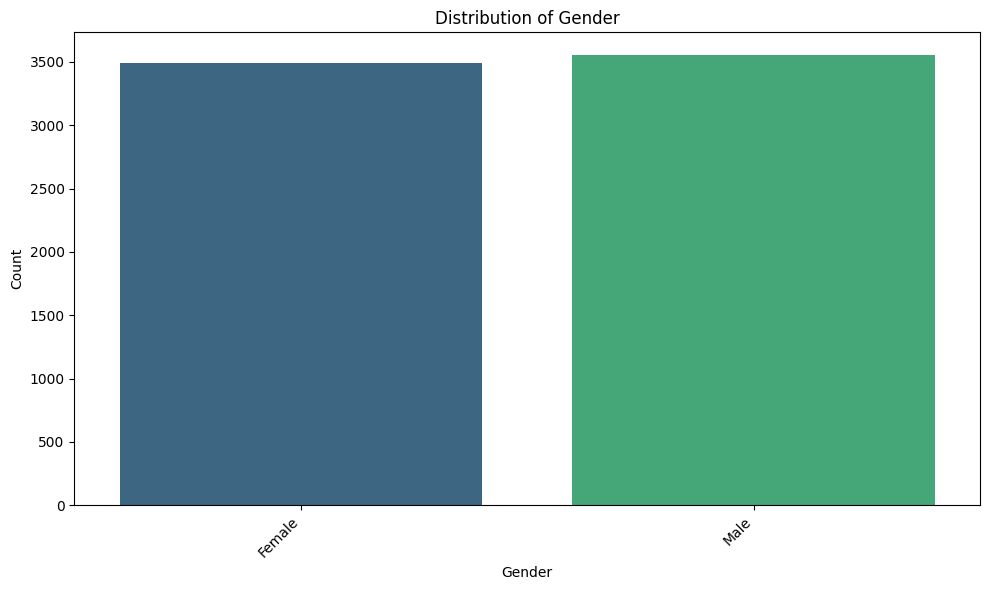

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


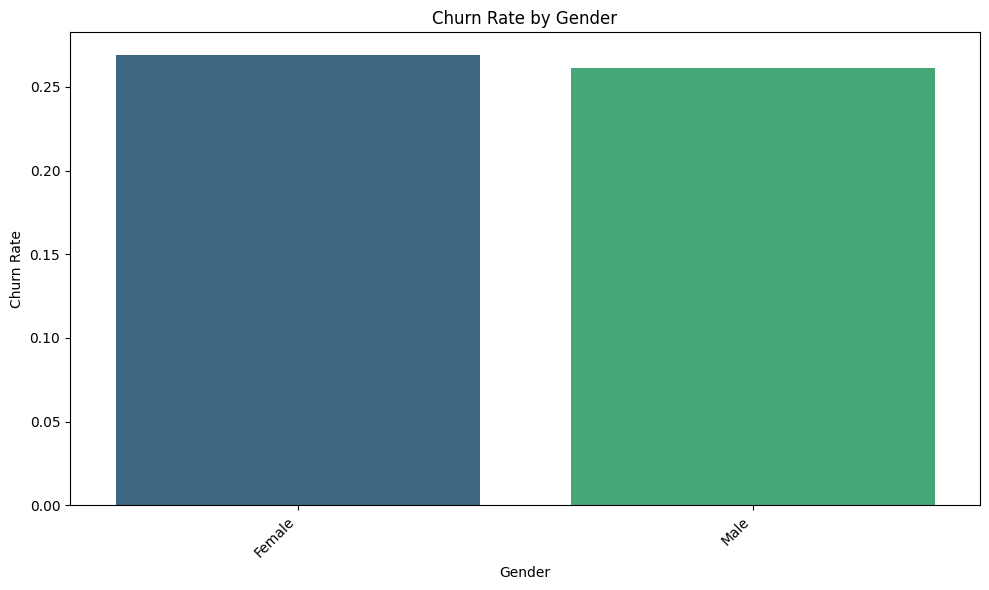

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


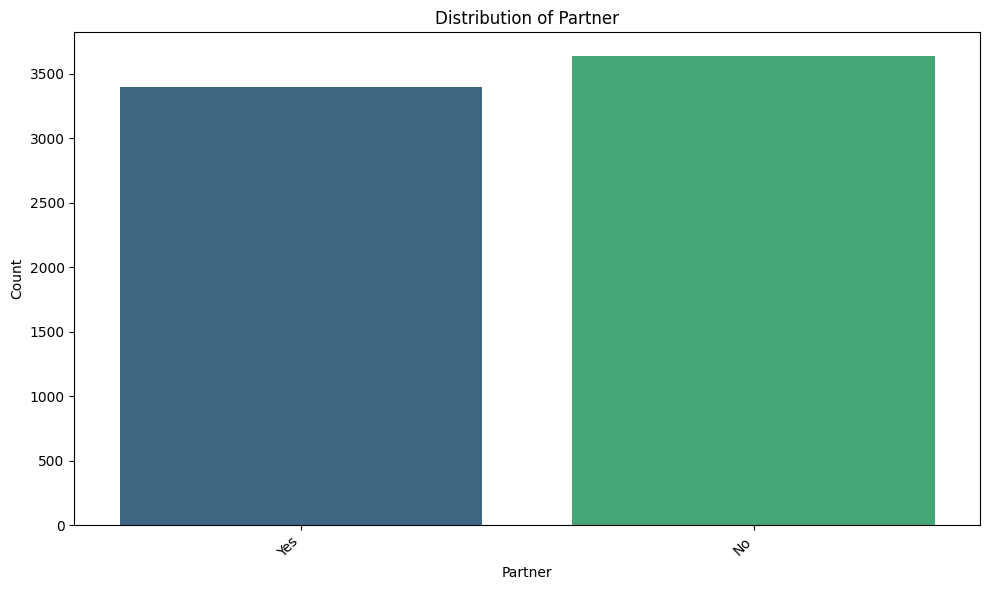

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


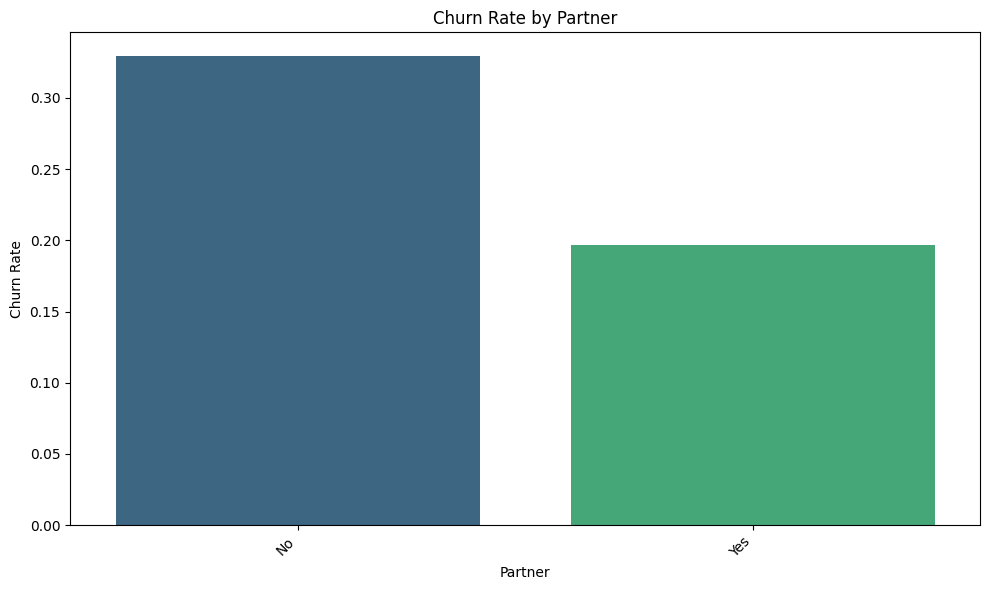

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


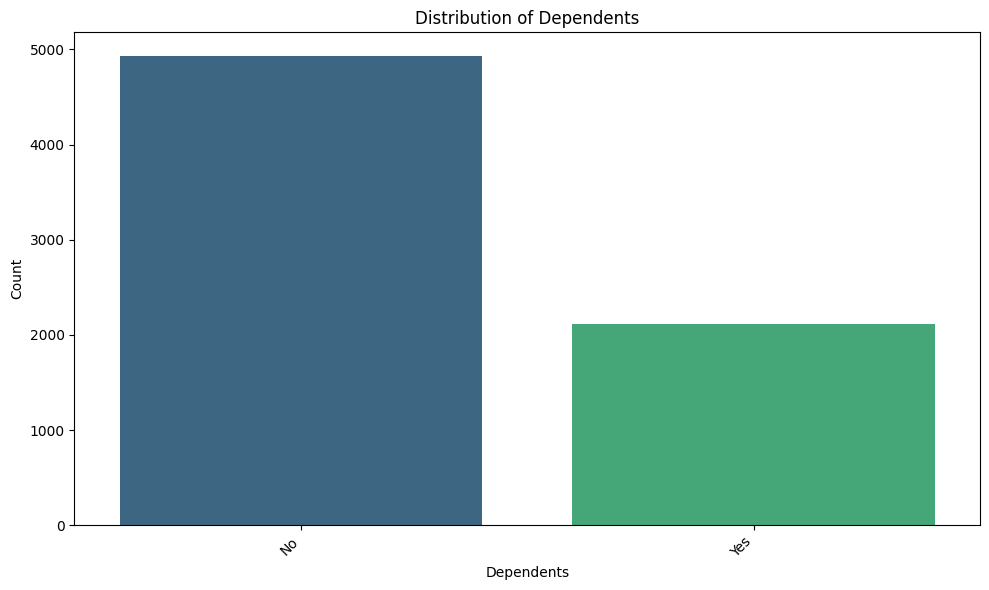

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


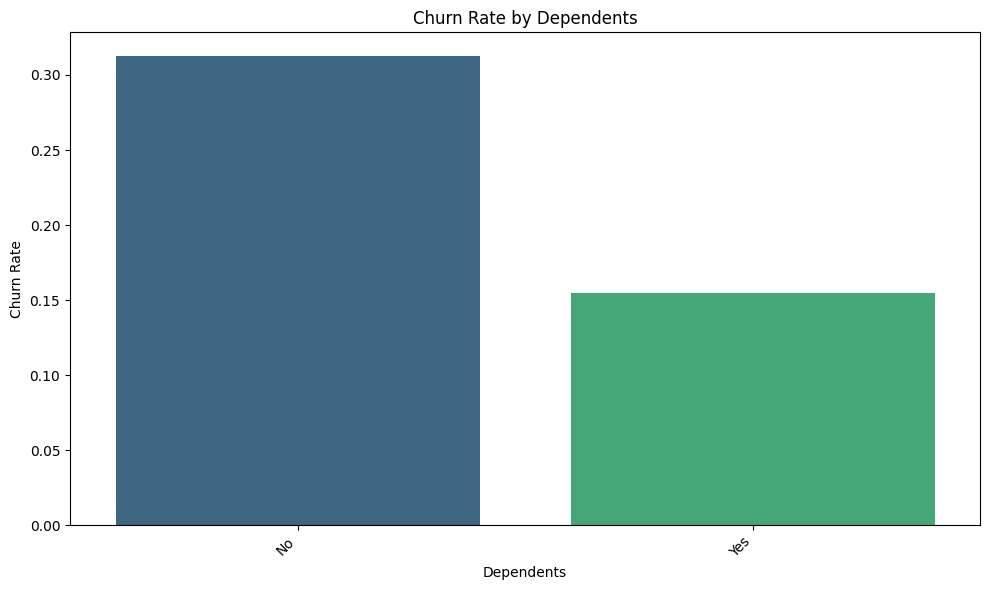

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


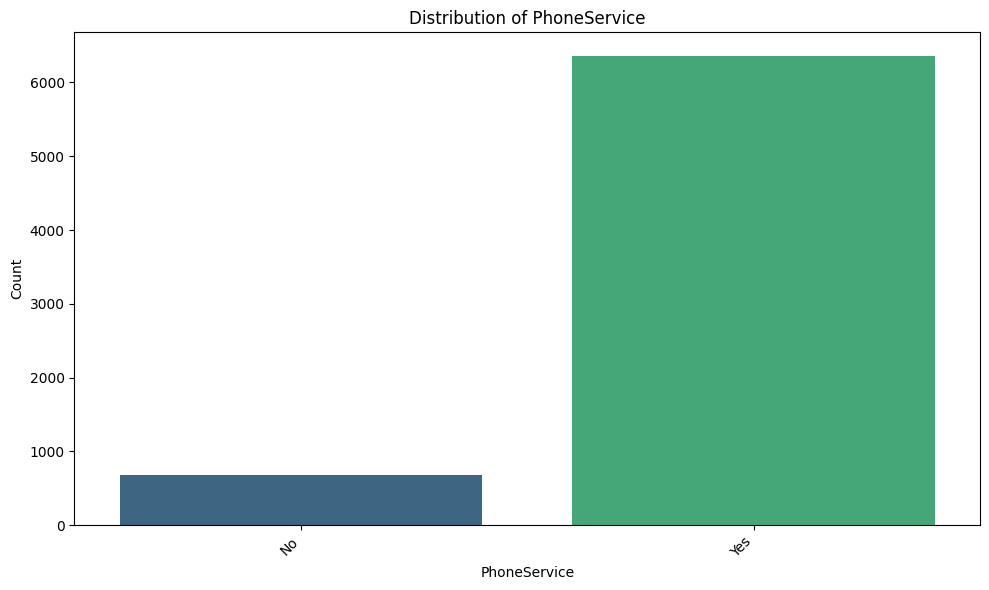

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


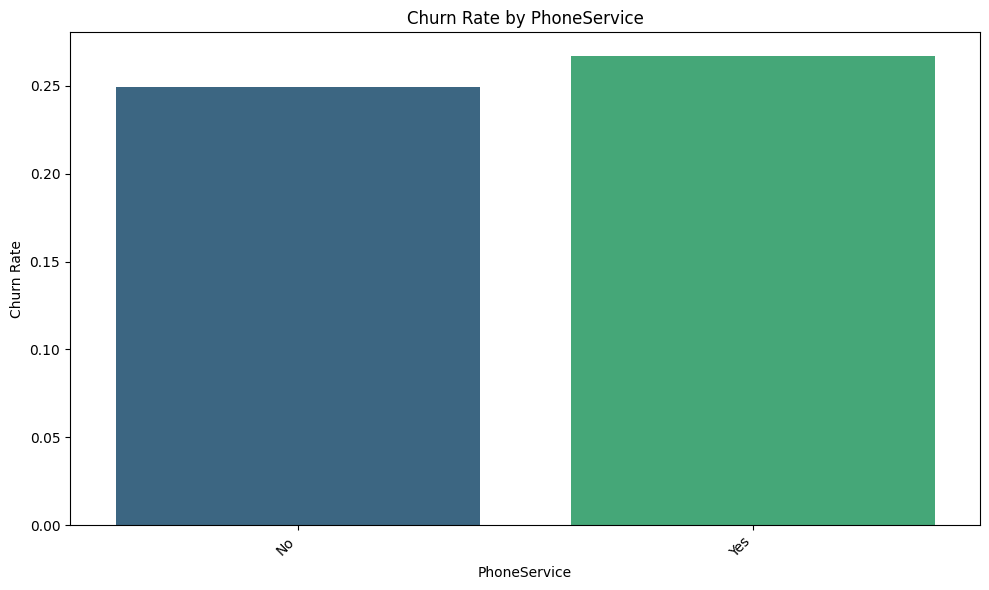

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


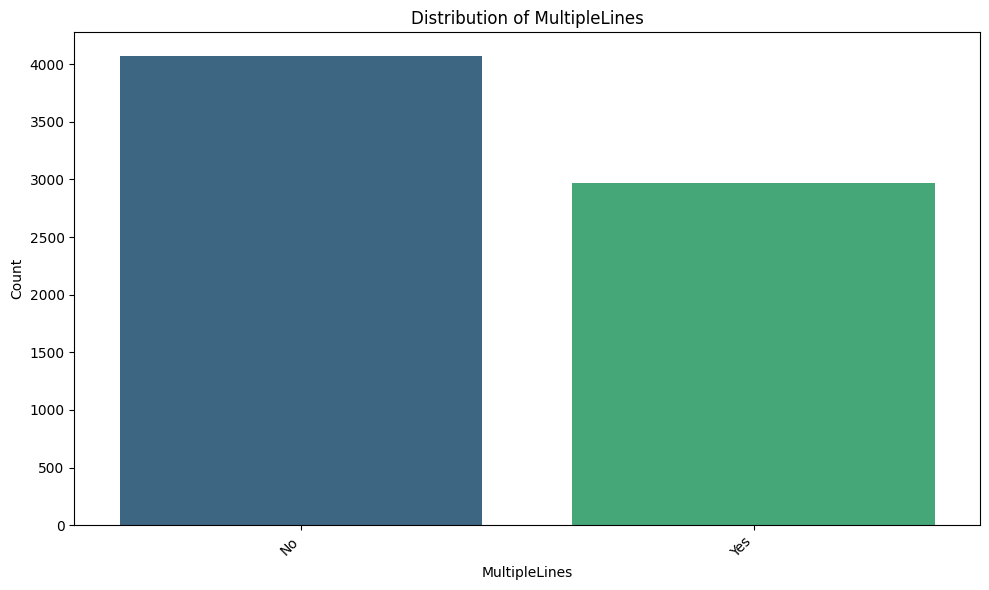

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


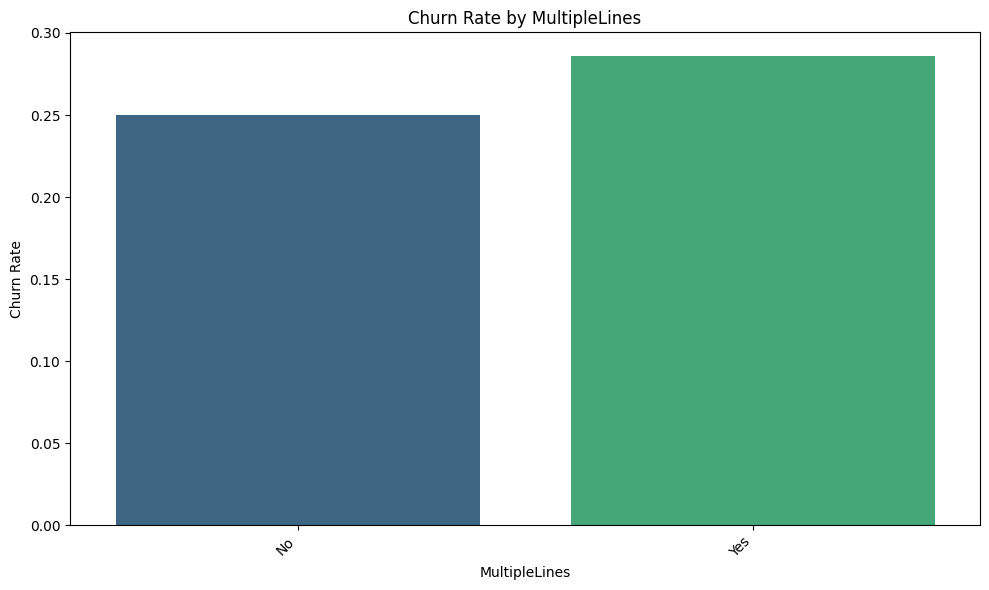

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


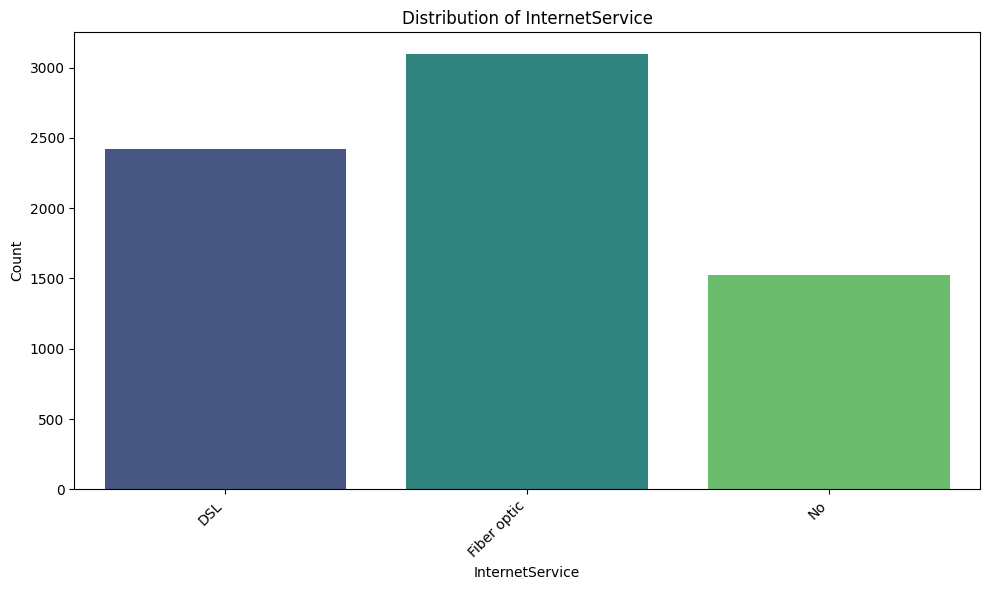

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


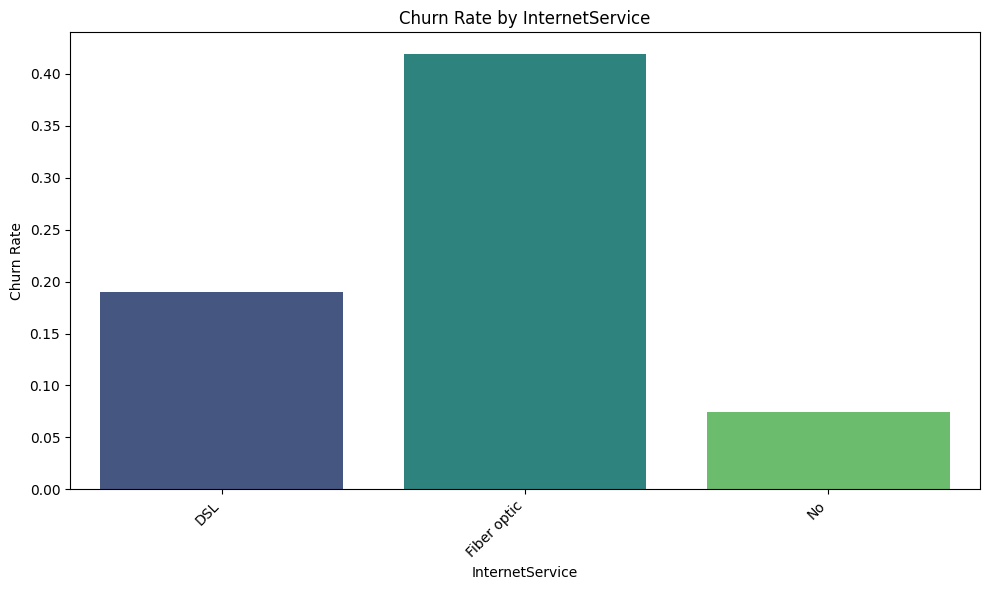

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


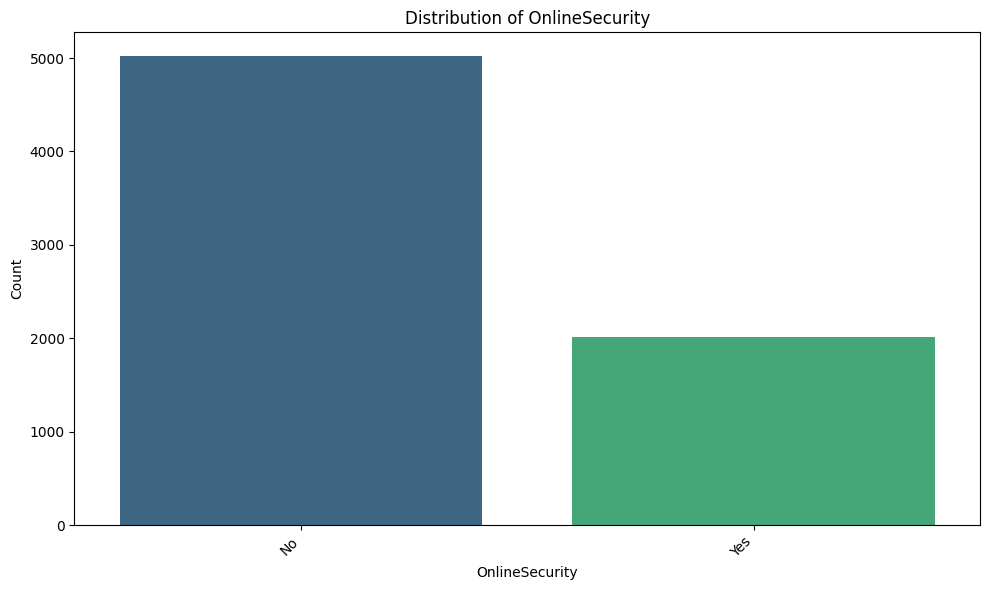

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


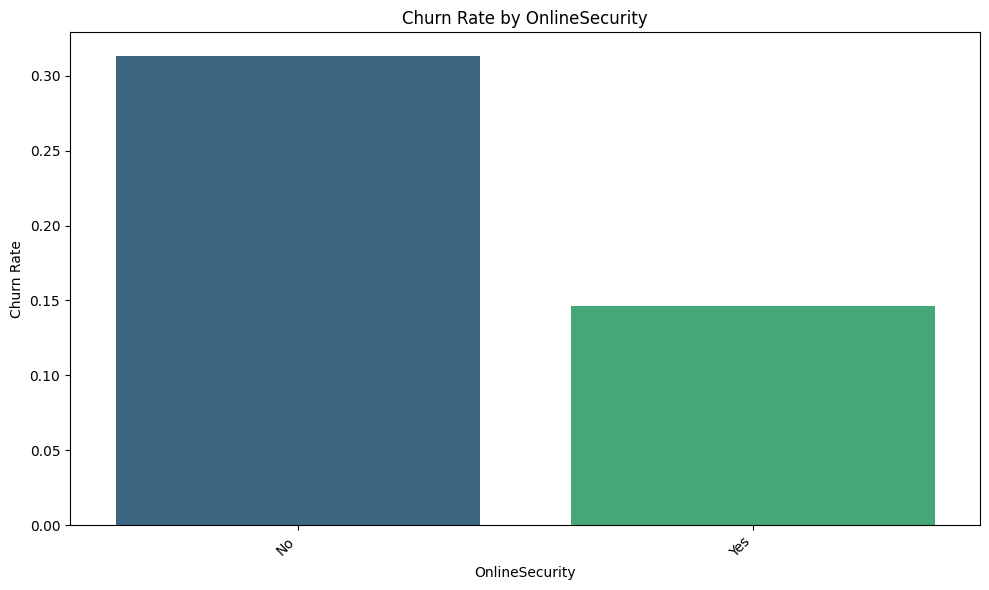

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


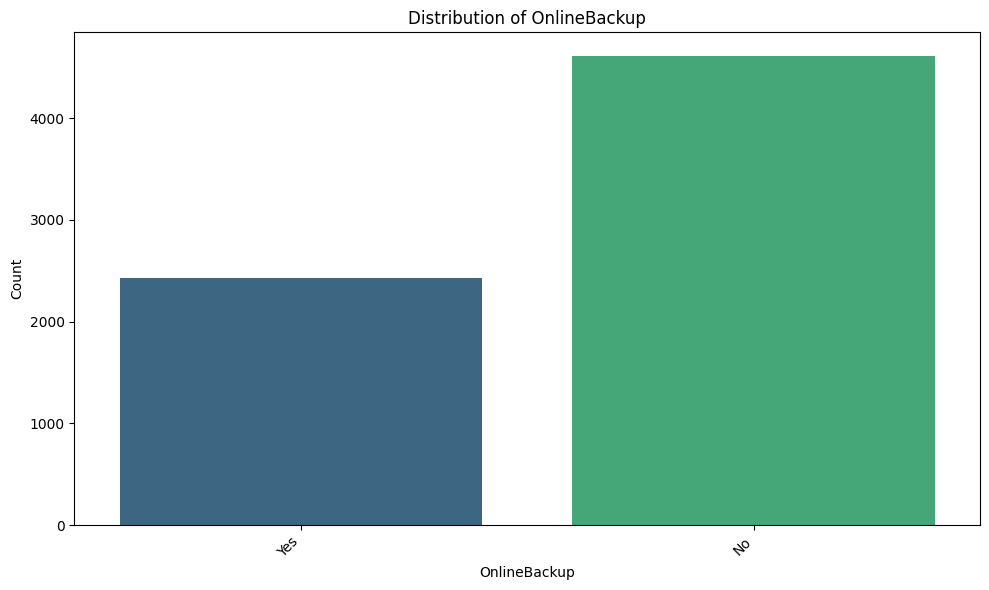

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


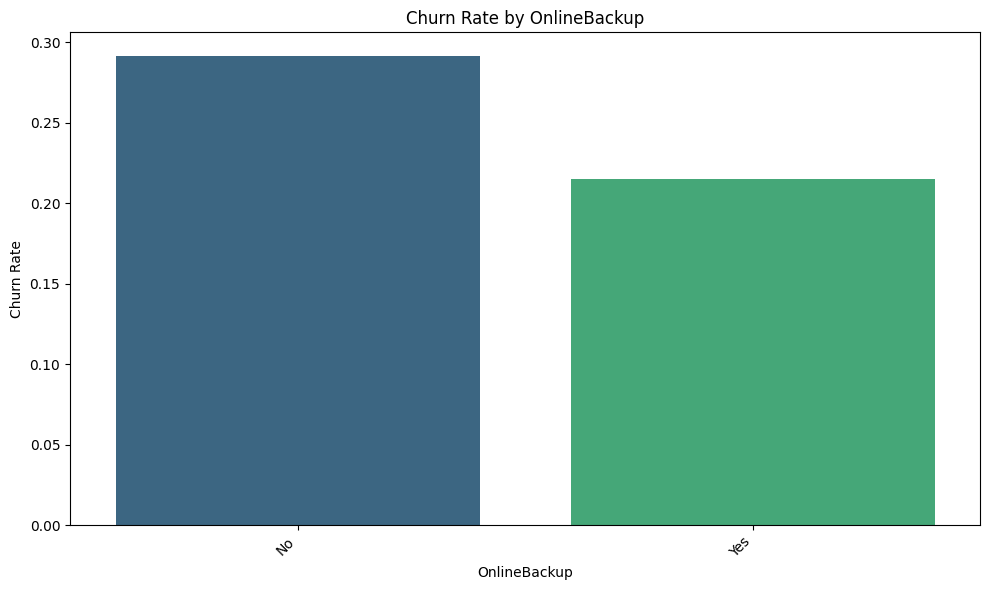

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


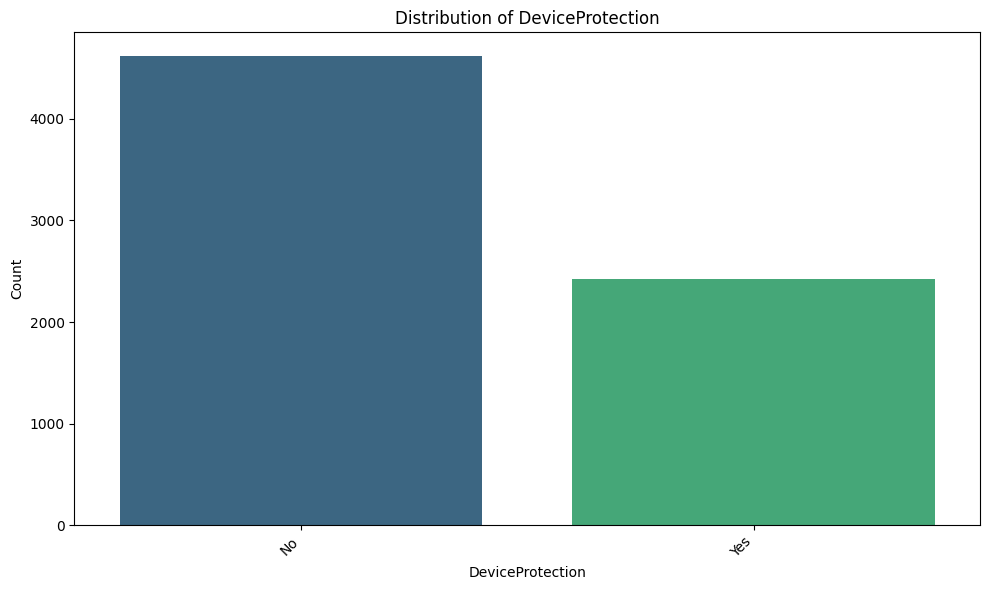

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


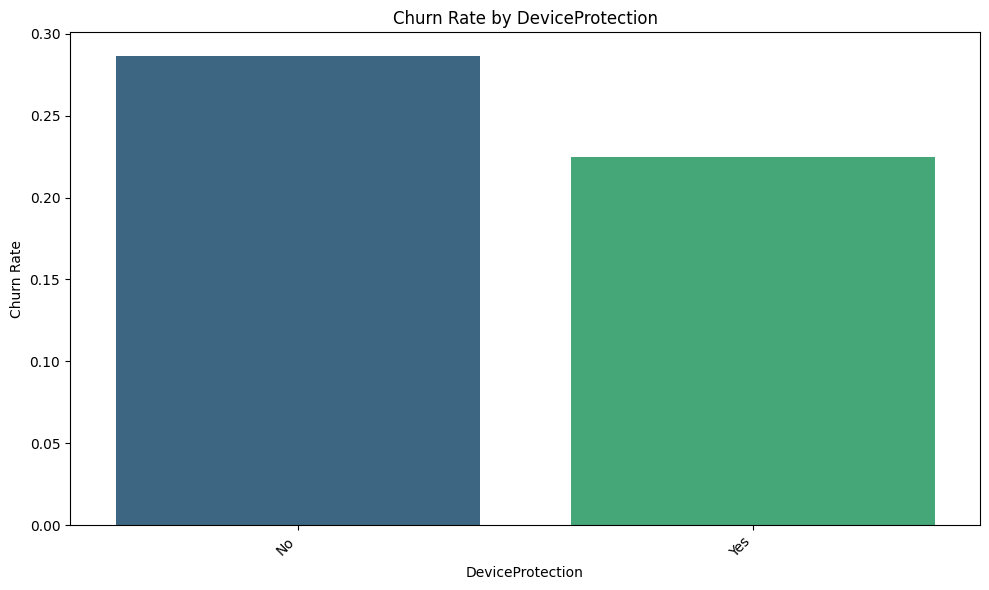

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


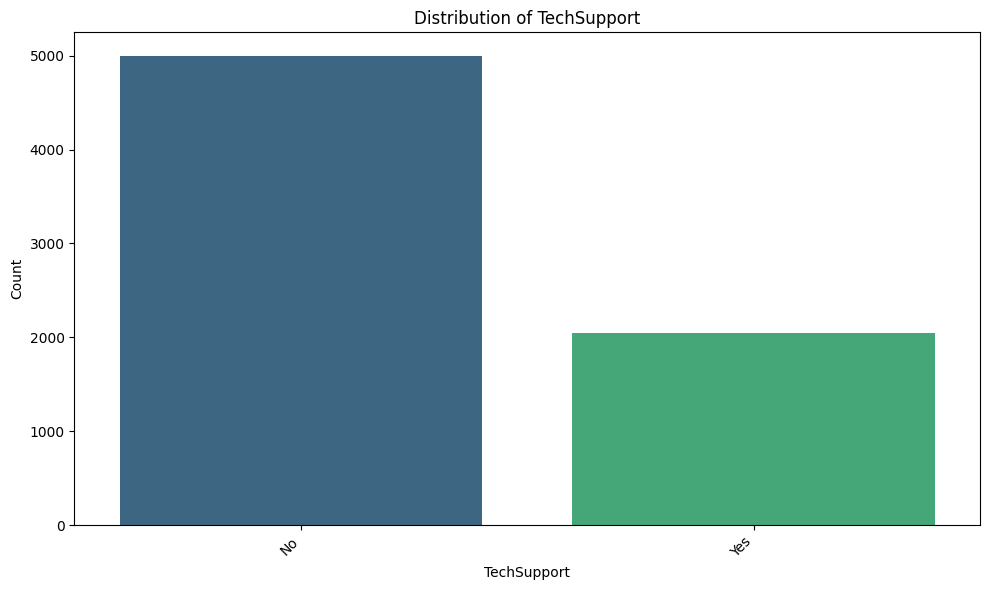

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


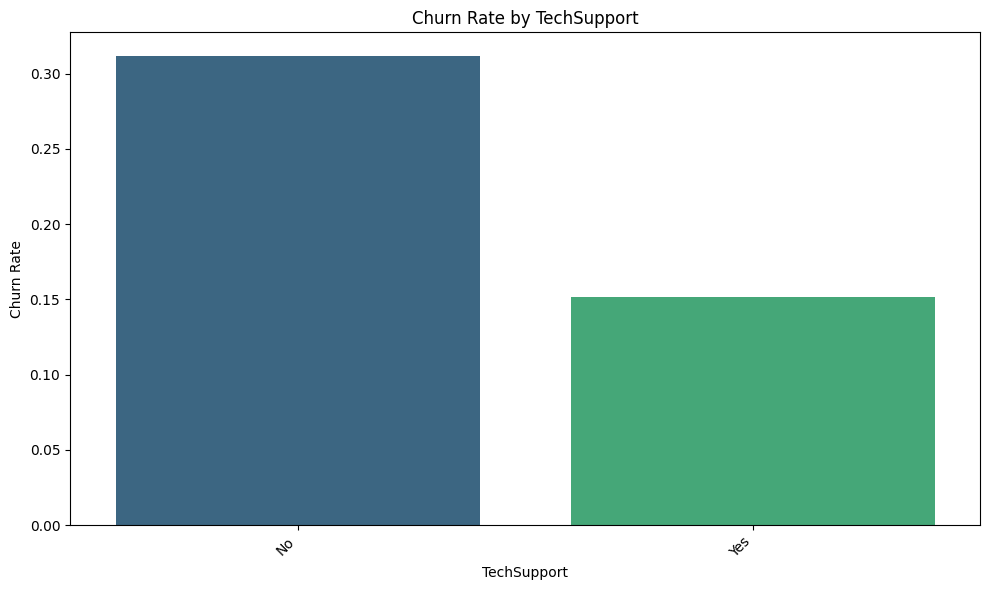

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


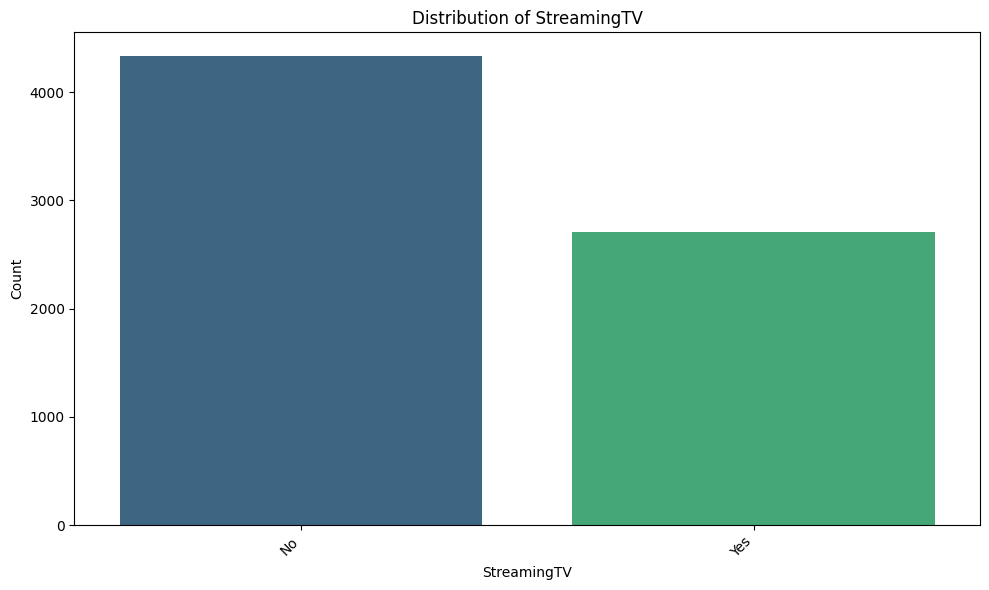

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


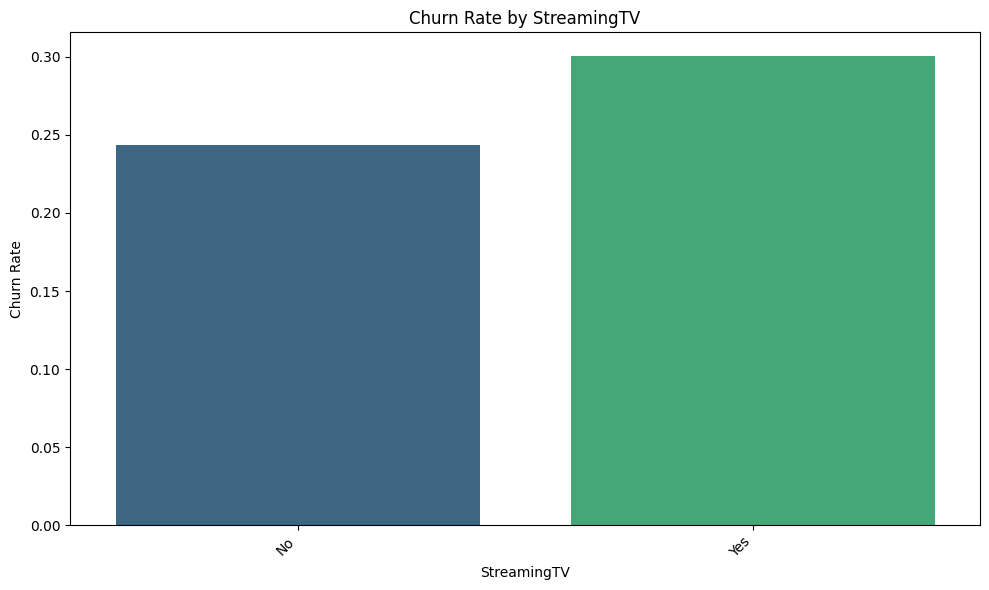

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


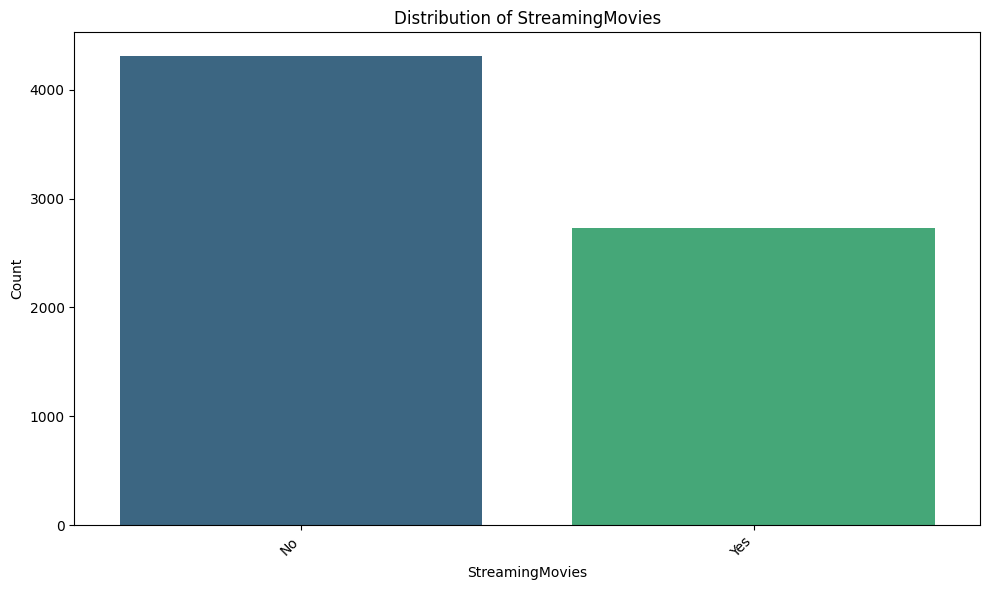

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


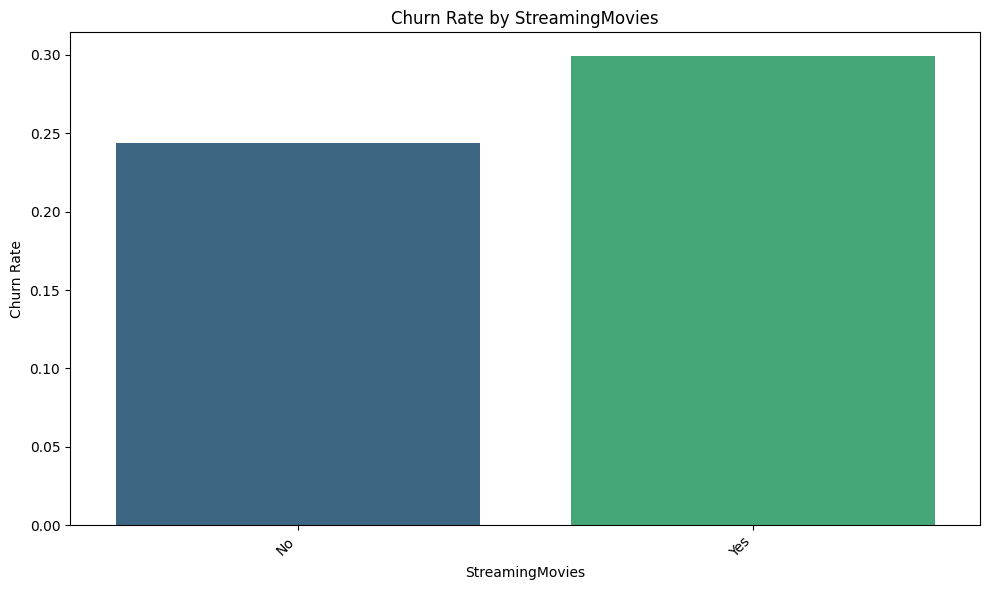

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


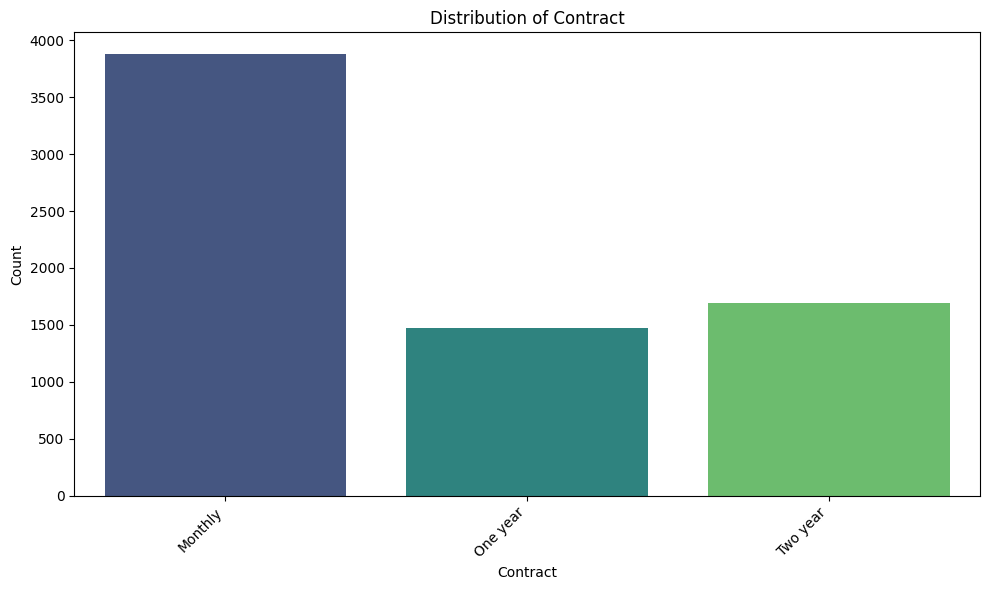

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


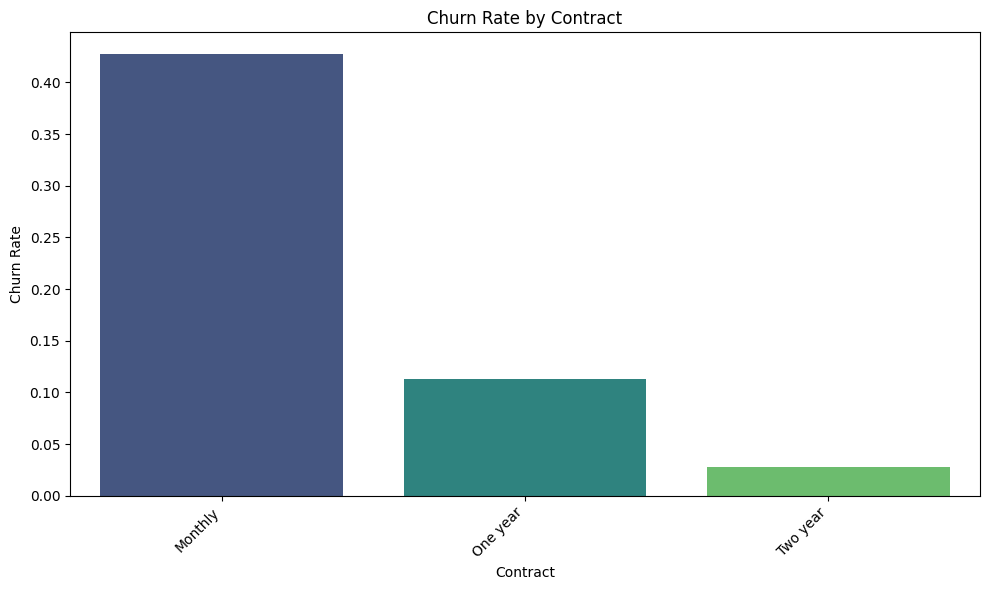

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


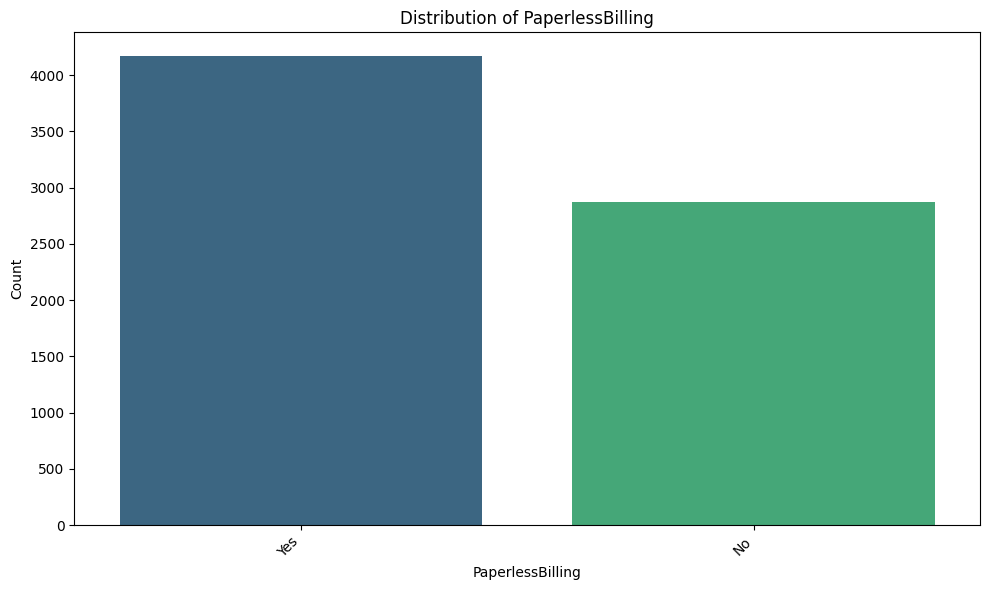

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


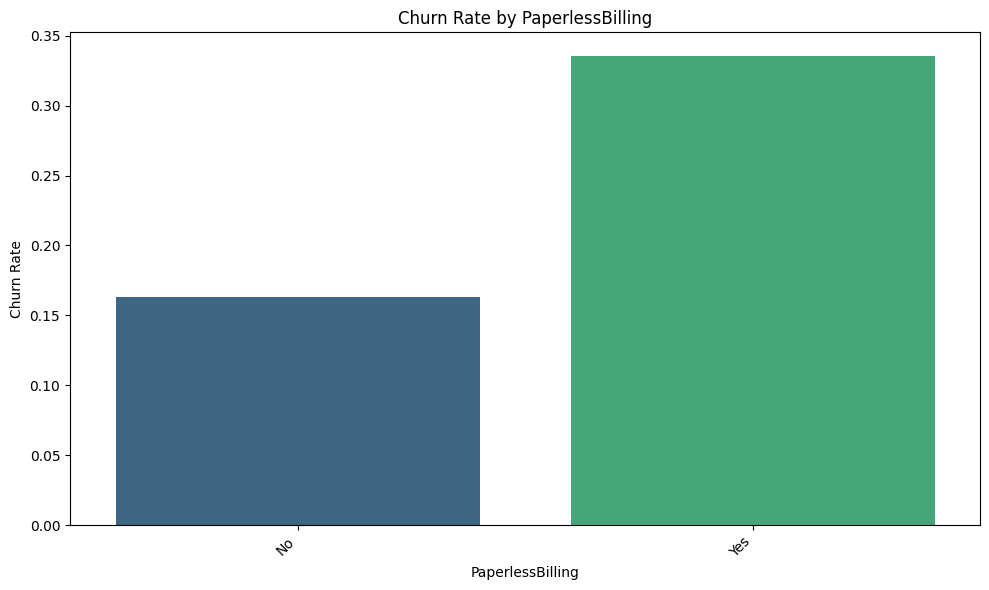

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


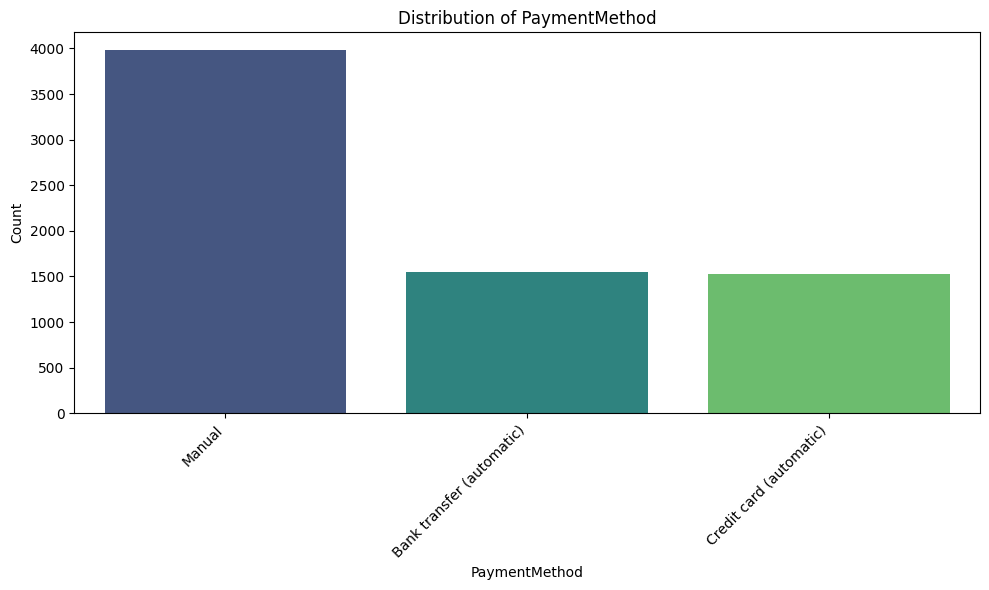

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


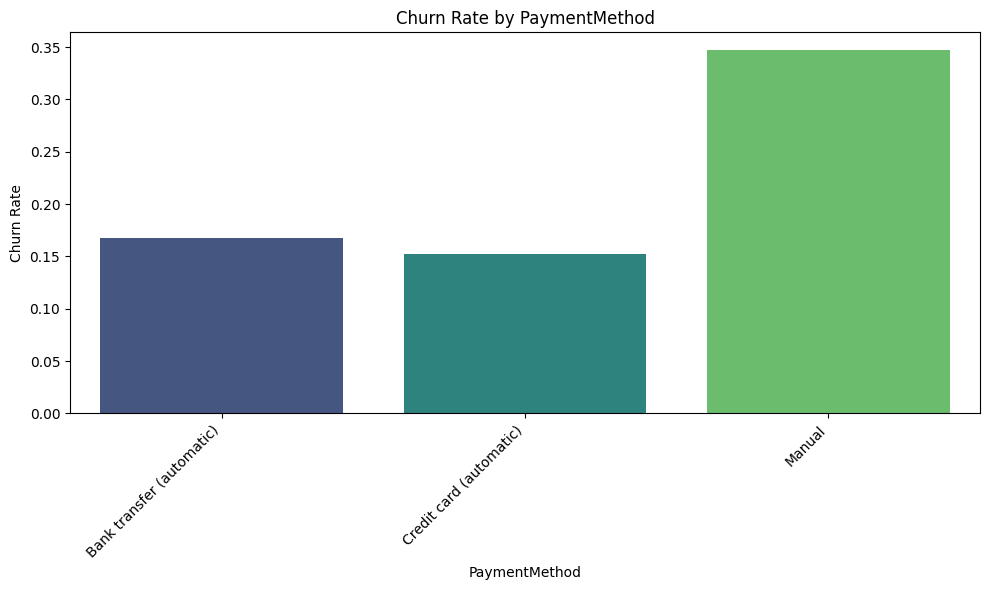

/tmp/ipython-input-439272538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


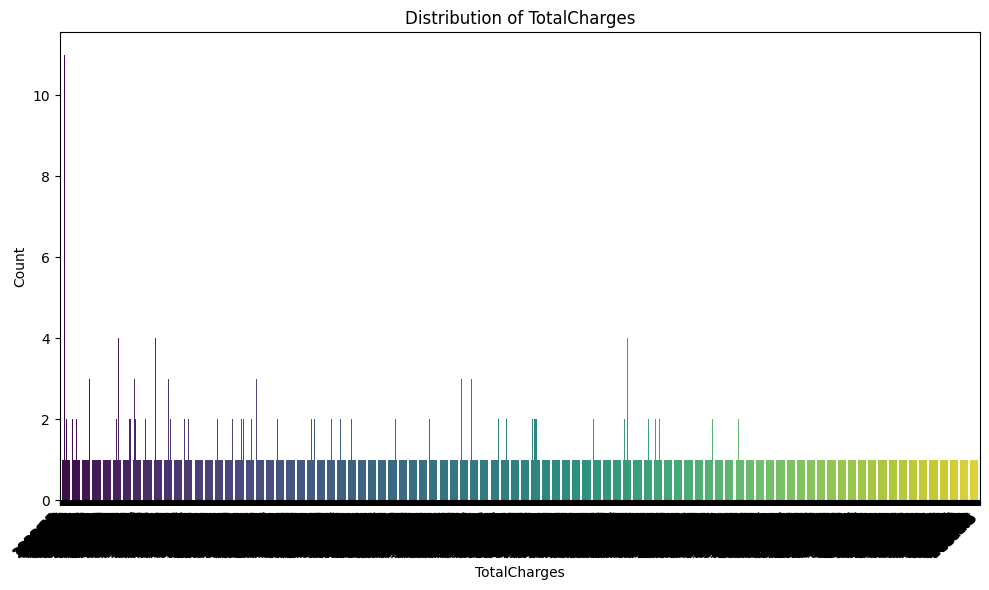

/tmp/ipython-input-439272538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')


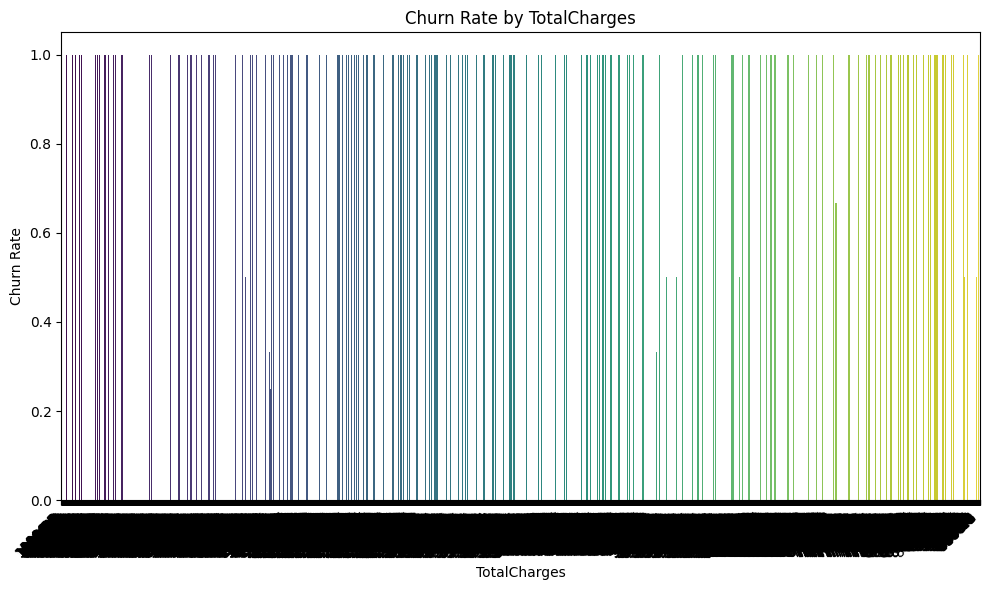

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')
# 'TotalCharges' needs conversion, so exclude for now
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

for col in categorical_cols:
    # Distribution of categorical features
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Churn rate by categorical features
    plt.figure(figsize=(10, 6))
    churn_rate = df.groupby(col)['Churn_numeric'].mean().reset_index()
    sns.barplot(data=churn_rate, x=col, y='Churn_numeric', palette='viridis')
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Drop the temporary numeric churn column
df = df.drop('Churn_numeric', axis=1)